# Fake News: From Definition to Identification

<h1> <font color = "green"> Executive Summary </font></h1>

### Introduction
The aim of my project is to explore algorythms to help identify fake news from real news. The subject of fake news became popular in connection with the recent US presidential elections and with possible Russian meddling into elections in the US, France, and Germany. The topic has become so hot that several crowdsourced groups composed a dataset that has about 13,000 articles published on various web-sites and categorized them between "bs" (as totally fake), just fake, conspiracy, hate, junksci, and bias.

### Methods and Results
I selected only the ones classified as 'bs' and only in English language to see what makes them stand aside and how I would be able to predict how likely the fresh news be credible or not. In order to compare the set with the credible news, I used a news web scraper package called "newspaper". It helped me to add 6000 credible news from the left, center and the right wings of the political specter. 

Having successfully trained the model on DataCamp's dataset produced interesting results on the data scraped from web and the data set I borrowed on Kaggle.com. This article has its own data set of about six thousand English language news, marked as fake or true. The article uses Multinomial Naive Bayes classifier and fits a model with .858 accuracy score. 

I intend to use the model that has been fit and tested on Datacamp's data and see if it is applicable to an independent dataset that I am creating in this notebook. Additionally, I want to see how using this model will result in credibility for the news from different political specters. 

Since applying MultinomialNB algorythm produced results that made me question the common sense, I decided to use other algorithms and finally went with RandomForest. It produced the most reliable results and proved strong through thrain/test split.

### Interpretation Results

- Using bag-of-words approach in identification of fake/real news proved as a valid approach for the given dataset and the dataset obtained through web-scraping. 
- Stemming and lemmatization decreases accuracy of prediction.
- Multinomial Naive Bayes, although proven effective for predicting spam emails, did not show its effectiveness predicting fake news from real. 
- RandomForest algorithm showed better results and performed well on a wide range of features. 
- Imporance features showed a strong influence of 2016 presidential elections.

### Recommendation/Next Steps

- I did not exclude satire and conspiracy news from the set. Mostly because they are popular on social networks. I think that in the future those two subcategories shall be studied separately. 
- It would also be interesting to re-approach this subject with word vectorizing techniques and see what topics can be identified in respect to political affiliation of a news source.

<h2><font color = "green"> Part 1: Datacamp's Dataset </font></h2>

Instead of introduction, I decided to use the dataset from Datacamp.com website and based on the model they develop,  use it to check on the datasets I have from Kaggle.com and the one I've scraped.
(https://www.datacamp.com/community/tutorials/scikit-learn-fake-news#gs.664H2N0) 

In [470]:
import pandas as pd
import matplotlib.pyplot as plt

In [488]:
dt = pd.read_csv("data/fake_or_real_news.csv")

In [489]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
Unnamed: 0    6335 non-null int64
title         6335 non-null object
text          6335 non-null object
label         6335 non-null object
dtypes: int64(1), object(3)
memory usage: 198.0+ KB


In [490]:
dt.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [491]:
dt = dt.set_index("Unnamed: 0") 

In [492]:
dt.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [493]:
# Checking how balanced the observation groups are.
dt.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [494]:
from sklearn.model_selection import train_test_split

In [495]:
#Set `y` 
y = dt.label 
 
# Drop the `label` column 
dt.drop("label", axis=1) 
 
# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(dt['text'], y, test_size=0.33, random_state=53)

In [496]:
# Originally the article on Datacamp uses both Countvectorizer and Tfid Vectorizer. 
# I just decided to go with the latter as for the large dataset and given the different size of articles
# would be a better decision on MultinomialNB 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [497]:
# Initialize the `tfidf_vectorizer`
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [498]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

[u'\u062d\u0644\u0628', u'\u0639\u0631\u0628\u064a', u'\u0639\u0646', u'\u0644\u0645', u'\u0645\u0627', u'\u0645\u062d\u0627\u0648\u0644\u0627\u062a', u'\u0645\u0646', u'\u0647\u0630\u0627', u'\u0648\u0627\u0644\u0645\u0631\u0636\u0649', u'\u0e22\u0e07ade']


In [499]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [500]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [501]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools

In [502]:
clf = MultinomialNB() 

accuracy:   0.857
Confusion matrix, without normalization


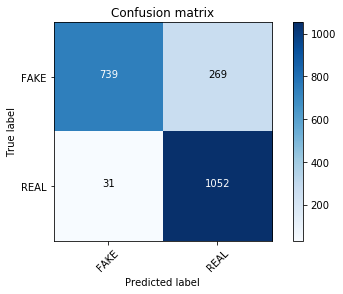

In [503]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
#rocauc = metrics.roc_auc_score(y_test, pred, average='weighted')
print ("accuracy:   %0.3f" % score)
#print ("ROC_AUC score:  %.3f" % rocauc)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

<font color = "grey"> So the model is fit and I will use it later on the Kaggle's dataset of fake news and the set of scraped news. </font>

<h2><font color = "green">Part 2: Kaggle.com dataset</font></h2>

In this part I import the dataset that was kindly crowdsourced and shared on Kaggle.com. I used this set also to try and identify what political wing the news sources belong to and try to identify any commonalities. I also will test this set on model fit above in Part 1.

In [504]:
%matplotlib inline
import time
import re
import tldextract

In [505]:
f = pd.read_csv('data/fake.csv')

In case you decide to upload the data from the Internet, you may have 
challenges with parsing the file. 

In [506]:
# url_ = 'https://github.com/baursafi/GA_DSI5_Capstone_Data/blob/master/fake.csv'
# a = pd.read_csv(url_)

In [507]:
print f.shape
f.head()

(12999, 20)


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [508]:
f.type.value_counts()

bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64

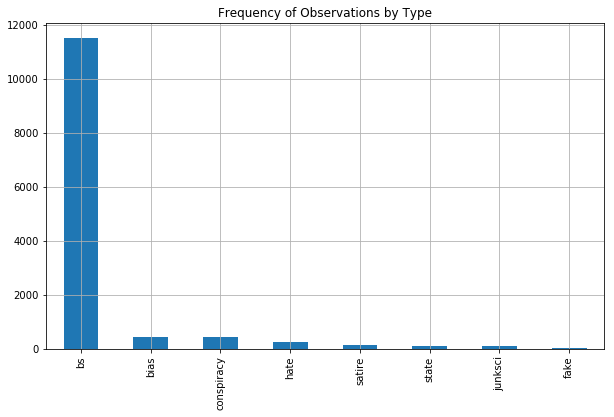

In [509]:
plt.figure(figsize=(10,6))
f.type.value_counts().plot(kind='bar',title = 'Frequency of Observations by Type', grid = True)

In [510]:
len(f.language.unique())

16

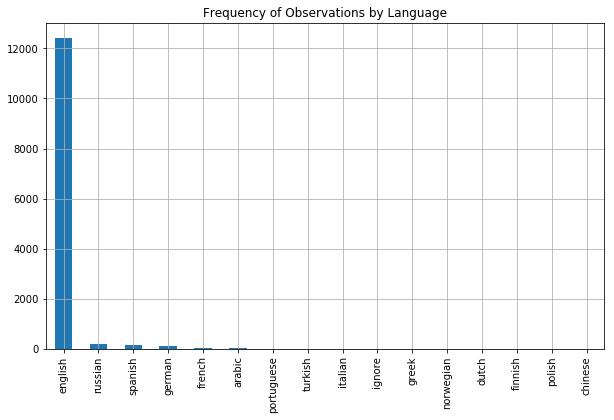

In [511]:
plt.figure(figsize=(10,6))
f.language.value_counts().plot(kind='bar',title = 'Frequency of Observations by Language', grid = True)

In [512]:
l = []
for i in range(len(f.text)):
    l.append(len(str(f.text[i])))
l = pd.DataFrame(l)
f['textlen'] = l

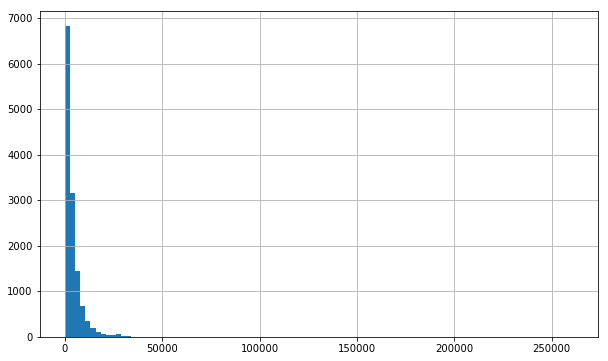

In [513]:
plt.figure(figsize=(10,6))
f.textlen.hist(bins = 100)

<h3>I decided to drop all observations with:</h3>

    - in other languages except English
    - only identified as 'bs' or 'fake'
    - only with lengh of more than 500 and less than 12,000 signs

In [514]:
#f = f[(f.type == 'bs')|(f.type == 'fake')]
f = f[f.language == 'english']
f = f[(f.textlen > 500)&(f.textlen < 12000)]
f = f[['site_url', 'title', 'text']]
f.reset_index(drop = 'index', inplace=True)
f.rename(columns = {'site_url':'url'}, inplace=True)
print f.shape
f.head()

(9925, 3)


,url,title,text
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...


<font color = "red"><b>NOTE:</b></font>

I will go with only those news that come from more or less established news agencies and agglomerators. I decided to take the first 200 web-sites. It looks like they have the vast majority of all the fake news (9885 news left after trimming off the blogs and long papers that hardly fall into the news category)

In [515]:
f.url.value_counts()[:200].sum()

9885L

In [516]:
#At this stage I can add 'label' of 'FAKE' news to the fake part of the dataset
f['label'] = 'FAKE'

In [517]:
f.head(2)

,url,title,text,label
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,FAKE
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,FAKE


<font color = "red"><h3>Note to political affiliations of the news sources</h3></font>

I checked as many as possible from https://mediabiasfactcheck.com  
Out of 215 news resources, 60 remain unidentified by their political affiliation. But a great part of them either totally into conspiracy or satire. 

In [518]:
f['wing'] = '0-unknown'
f['conspiracy'] = 0
f['satire'] = 0

In [519]:
f.head(1)

,url,title,text,label,wing,conspiracy,satire
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,FAKE,0-unknown,0,0


In [520]:
# below I have checked 215 news resources at https://mediabiasfactcheck.com to identify the political affiliation
# for each of the news aggregator or the news agency

f.loc[f.url.str.contains('consortiumnews|usatoday|politifact|sctimes|timesofsandiego'),'wing'] = '4-center'
f.loc[f.url.str.contains('presstv|mintpressnews|latimes|chicagotribune|bustle|natmonitor|politico'),'wing'] = '3-center left'
f.loc[f.url.str.contains('antiwar|russia-insider|sputniknews|strategic-culture|postbulletin|hpenews|ustfactsdaily'),'wing'] = '5-center right'
f.loc[f.url.str.contains('politicususa|opednews|liberalamerica|truthdig|counterpunch|blackagendareport|guardianlv|ahtribune|intrepidreport|wakingtimes|addictinginfo|activistpost|other98|countercurrents|huffingtonpost|rabble|cnn'),'wing'] = '2-left'
f.loc[f.url.str.contains('naturalnews|ijr|wearechange|awdnews|twitchy|thenewamerican|amtvmedia|abovetopsecret|nowtheendbegins|thecommonsenseshow|fromthetrenchesworldreport|nakedcapitalism|prisonplanet|investmentwatchblog|ronpaulinst|thecontroversialfiles|gulagbound|rt|thedailybell|corbettreport|zerohedge|whatreally|wikileaks|newstarg|regated|southfront'),'wing'] = '6-right'
f.loc[f.url.str.contains('occupydemocrats|ifyouonlynews|pravdareport|usuncut|newcenturytimes|trueactivist|dailynewsbin'),'wing'] = '1-extreme left'
f.loc[f.url.str.contains('madworldnews|thefederalistpapers|conservativetribune|libertyunyielding|truthfeed|freedomoutpost|frontpagemag|dccl|othesline|wnd|ihavethetruth|amren|barenakedislam|returnofkings|trunews|jewsnews|shtfplan|lewrockwell|dailystormer|libertynews|endingthefield|dailywire|vdare|100percentfedup|21stcenturywire|westernjournalism|redflagnews|libertywritersnews|conservativedailypost|departed|breitbart|donaldtrumpnews.co|bipartisanreport|americanlookout|spinzon|usapoliticsnow|usanewsflash|hangthebankers|toprightnews|usasupreme|americasfreedomfighters|viralliberty'),'wing'] = '7-extreme right'



In [521]:
# below, similarly to the cell above the code assigns whether the news agency or agregator 
# publishes conspiracy/pseudoscience news / information

f.loc[f.url.str.contains('yournewswire|trunews|naturalnews|infowars|eutimes|truthfeed|topinfopost|thedailysheeple|jewsnews|wearechange|awdnews|worldtruth|govtslaves|thetruthseeker.co|amtvmedia|sott|abovetopsecret.com|collective-evolution.com|shtfplan.com|theeventchronicle.com|thefreethoughtproject.com|humansarefree.com|veteranstoday.com|lewrockwell.com|nowtheendbegins.com|thecommonsenseshow.com|themindunleashed.comfromthetrenchesworldreport.com|intellihub.com|realfarmacy.com|greanvillepost.com|dailystormer.com|disclose.tv|whydontyoutrythis.com|prisonplanet.com|investmentwatchblog.com|thecontroversialfiles.net|godlikeproductions.com|anonhq.com|abeldanger.net|wakingtimes.com |gulagbound.com|endingthefed.com|healthimpactnews.com|truthbroadcastnetwork.com|21stcenturywire.com|corbettreport.com|undergroundhealth.com|zerohedge.com|geoengineeringwatch.org|conservativedailypost.com|pakalertpress.com|whatreallyhappened.com|coasttocoastam.com|trueactivist.com|activistpost.com|theantimedia.org|usapoliticsnow.com|newstarget.com|theearthchild.co.za|anonews.co|southfront.org|americasfreedomfighters.com|davidwolfe.com|vigilantcitizen.com'),'conspiracy'] = 1


In [522]:
f.loc[f.url.str.contains('waterfordwhispersnews|theonion|thedailymash|thespoof|clickhole|newsthump|newsbiscuit|theunrealtimes|dailysquib|adobochronicles|gomerblog|thelastlineofdefense|satirewire|reductress'),'satire'] = 1


Thus the news that belong to those news sources split between the political affiliations in the following manner

In [523]:
f.wing.value_counts()

0-unknown          4718
7-extreme right    2034
6-right            1770
2-left              677
5-center right      273
1-extreme left      249
3-center left       204
Name: wing, dtype: int64

In [524]:
f.head()

,url,title,text,label,wing,conspiracy,satire
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,FAKE,7-extreme right,0,0
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,FAKE,7-extreme right,0,0
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,FAKE,7-extreme right,0,0
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,FAKE,7-extreme right,0,0
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,FAKE,7-extreme right,0,0


0-unknown          4718
7-extreme right    2034
6-right            1770
2-left              677
5-center right      273
1-extreme left      249
3-center left       204
Name: wing, dtype: int64

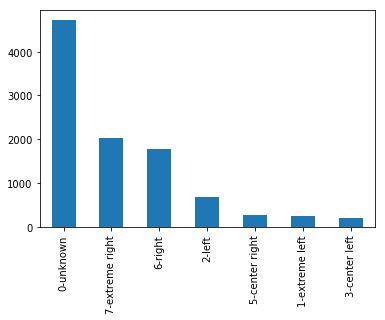

In [525]:
# I could only identify about 140 resources by their political wing affiliation. The rest 60 remained unknown. 
# The great part of those are satirical resource. So I decided to keep them. 

f.wing.value_counts().plot(kind = 'bar')
f.wing.value_counts()

### Top 10 most popular words from the list of 100 for each political affiliation:

In [526]:
# z_ = pd.DataFrame(z_)
# z_.columns = i
# z_

In [527]:
z_z = pd.DataFrame()
z_ = []
for i in sorted(f.wing.unique()):
    cvec = CountVectorizer(stop_words='english')
    cvec.fit(f[f.wing == i].text)
    cvecdata = cvec.transform(f[f.wing == i].text)
    df = pd.DataFrame(cvecdata.todense(),
                     columns = cvec.get_feature_names())
    z_ = pd.DataFrame(df.sum())
    z_.columns = ["sums"]
    z_ = pd.DataFrame(z_.sums.sort_values(ascending=False)[:100]/float(z_.sum())*100)
    z_z = pd.concat([z_z,z_], axis = 1)
z_z.columns = f.wing.unique()
z_z.dropna(inplace = True)
print z_z.shape

(29, 7)


In [528]:
z_z = z_z[sorted(f.wing.unique())]
z_z['mean'] = z_z.mean(axis=1)
z_z = z_z.sort_values(by = "mean", ascending=False)[:10]
z_z.to_csv("data/fake_word_freq.csv")
z_z

,0-unknown,1-extreme left,2-left,3-center left,5-center right,6-right,7-extreme right,mean
trump,2.383475,0.737667,0.345683,0.899887,0.296505,0.930368,0.529518,0.874729
clinton,0.720949,0.711559,0.626210,0.991944,0.395339,0.587203,0.536496,0.652814
said,0.463840,0.409189,0.892259,0.509110,0.413436,0.294597,0.382422,0.480693
people,0.444730,0.489048,0.508570,0.457677,0.324345,0.534255,0.444190,0.457545
hillary,0.531591,0.427618,0.231662,0.788636,0.224118,0.298179,0.338963,0.405824
2016,0.436044,0.371137,0.571915,0.331704,0.199062,0.235279,0.254257,0.342771
election,0.644511,0.267389,0.244331,0.377360,0.136420,0.322862,0.271668,0.323506
new,0.307489,0.309025,0.298626,0.307665,0.328522,0.325649,0.318236,0.313602
president,0.408248,0.296568,0.238901,0.294248,0.300681,0.273497,0.222544,0.290670
just,0.491635,0.265683,0.166507,0.355930,0.158693,0.258369,0.331432,0.289750


In [529]:
df.head()

,00,000,000km,001,007,00o,01,015,018,02,...,ź300,ź4,ź50,за,эa,эin,эthe,إنفوجرافيك,السعودية,ノhillbro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [530]:
f.groupby('wing').sum()

,conspiracy,satire
wing,,
0-unknown,1903,741
1-extreme left,9,0
2-left,8,0
3-center left,0,0
5-center right,0,0
6-right,902,0
7-extreme right,567,0


### Satirical articles have the whole story out of the most frequent words.

In [531]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(f[f.satire == 1].text)
cvecdata = cvec.transform(f[f.satire == 1].text)
df = pd.DataFrame(cvecdata.todense(),
                 columns = cvec.get_feature_names())
z_ = pd.DataFrame(df.sum())
z_.columns = ["percent"]
z_ = pd.DataFrame(z_.percent.sort_values(ascending=False)[:100]/float(z_.sum())*100)
z_.head(10)

,percent
trump,0.769656
just,0.656520
said,0.539255
like,0.451719
2016,0.442635
people,0.425293
time,0.407125
new,0.403822
election,0.346015
day,0.331150


### Now, let's run the "FAKE" dataset on the model I earlier fit on DataCamp.com

In [532]:
# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(f.text)
y = f.label

In [533]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

[u'\u062d\u0644\u0628', u'\u0639\u0631\u0628\u064a', u'\u0639\u0646', u'\u0644\u0645', u'\u0645\u0627', u'\u0645\u062d\u0627\u0648\u0644\u0627\u062a', u'\u0645\u0646', u'\u0647\u0630\u0627', u'\u0648\u0627\u0644\u0645\u0631\u0636\u0649', u'\u0e22\u0e07ade']


In [534]:
pred = clf.predict(tfidf_test)

In [535]:
pred_df = pd.DataFrame(pred)
pred_df[0].value_counts()

FAKE    7348
REAL    2577
Name: 0, dtype: int64

In [536]:
score = metrics.accuracy_score(y, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.740


Not a bad result for the FAKE news

<h2><font color = "green"> Let's first preprocess the text and rerun transform with help of the model and check the results again

Code is borrowed from Evann Smith's LDA presentation
https://github.com/baursafi/GA/blob/master/modeling_text_data.ipynb

### Preprocess the Data
- Lowercase
- Tokenize
- Remove stop words and punctuation
- Remove words with fewer than 2 characters
- Stem

In [537]:
import random
import string
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tqdm import tqdm
tqdm.pandas(desc='progress-bar')

In [538]:
stop = set(stopwords.words('english') + list(string.punctuation))
stemmer = PorterStemmer()
re_punct = re.compile('[' + ''.join(string.punctuation) + ']')

In [539]:
def preprocess(text):
    try:
        text = text.lower()
        tokens = word_tokenize(text)
        tokens = [t for t in tokens if not t in stop]
        tokens = [re.sub(re_punct, '', t) for t in tokens]
        tokens = [t for t in tokens if len(t) > 2]
        tokens = [stemmer.stem(t) for t in tokens]
        if len(tokens) == 0:
            return None
        else:
            return ' '.join(tokens)
    except:
        return None

In [540]:
data_f = f[['url','title','text','wing', 'conspiracy', 'label']]
print data_f.shape
data_f.head()

(9925, 6)


,url,title,text,wing,conspiracy,label
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,7-extreme right,0,FAKE
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,7-extreme right,0,FAKE
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,7-extreme right,0,FAKE
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,7-extreme right,0,FAKE
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,7-extreme right,0,FAKE


In [541]:
data_f['tokens'] = data_f['text'].progress_map(preprocess)
data_f = data_f[data_f['tokens'].notnull()]
data_f.reset_index(inplace=True)
data_f.drop('index', inplace=True, axis=1)

progress-bar: 100%|██████████| 9925/9925 [01:18<00:00, 126.07it/s]


In [542]:
print('{} text'.format(len(data_f)))
data_f.head()

9925 text


,url,title,text,wing,conspiracy,label,tokens
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,7-extreme right,0,FAKE,print pay back money plu interest entir famili...
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,7-extreme right,0,FAKE,attorney gener loretta lynch plead fifth barra...
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,7-extreme right,0,FAKE,red state fox news sunday report morn anthoni ...
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,7-extreme right,0,FAKE,email healthcar reform make america great sinc...
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,7-extreme right,0,FAKE,print hillari goe absolut berserk explod bill ...


Now I can run the tokenized preprocessed news in the model fit on the DataCamp dataset.

In [543]:
# Transform the test set 
tfidf_test_tokens = tfidf_vectorizer.transform(data_f.tokens)
y = data_f.label

In [544]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

[u'\u062d\u0644\u0628', u'\u0639\u0631\u0628\u064a', u'\u0639\u0646', u'\u0644\u0645', u'\u0645\u0627', u'\u0645\u062d\u0627\u0648\u0644\u0627\u062a', u'\u0645\u0646', u'\u0647\u0630\u0627', u'\u0648\u0627\u0644\u0645\u0631\u0636\u0649', u'\u0e22\u0e07ade']


In [545]:
pred = clf.predict(tfidf_test_tokens)

In [546]:
pred_f = pd.DataFrame(pred)
pred_f[0].value_counts()

FAKE    6947
REAL    2978
Name: 0, dtype: int64

In [547]:
score = metrics.accuracy_score(y, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.700


In [548]:
data_f['pred'] = pred
data_f.head()

,url,title,text,wing,conspiracy,label,tokens,pred
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,7-extreme right,0,FAKE,print pay back money plu interest entir famili...,FAKE
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,7-extreme right,0,FAKE,attorney gener loretta lynch plead fifth barra...,REAL
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,7-extreme right,0,FAKE,red state fox news sunday report morn anthoni ...,FAKE
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,7-extreme right,0,FAKE,email healthcar reform make america great sinc...,REAL
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,7-extreme right,0,FAKE,print hillari goe absolut berserk explod bill ...,FAKE


In [551]:
# Here I decided to build a little table of how each wing of political affiliation performs on the FAKE/REAL model 
# trained on the DataCamp.com dataset.

z_f = pd.concat([data_f[data_f.pred == "FAKE"].wing.value_counts(),data_f[data_f.pred == "REAL"].wing.value_counts()], join='outer', axis = 1)

In [552]:
z_f.columns = ['FAKE', 'REAL']
z_f['TOTAL'] = z_f.REAL + z_f.FAKE
z_f['CREDIBILITY'] = z_f.REAL/(z_f.FAKE +z_f.REAL)
z_f.to_csv('data/z_f_pred.csv')
z_f

,FAKE,REAL,TOTAL,CREDIBILITY
0-unknown,3681,1037,4718,0.219797
1-extreme left,109,140,249,0.562249
2-left,367,310,677,0.457903
3-center left,141,63,204,0.308824
5-center right,213,60,273,0.219780
6-right,1197,573,1770,0.323729
7-extreme right,1239,795,2034,0.390855


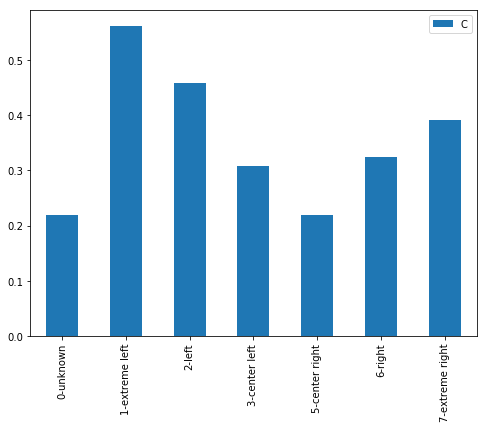

In [553]:
plt.figure(figsize=(8,6))
z_f.CREDIBILITY.plot(kind = 'bar')
_ = plt.legend("Credibility of Kaggle's FAKE' news in accordance with the DataCamp's model")
plt.show()

<h2><font color = "green"> Preliminary Summary</font></h2>

Tokenizing the text decreases accuracy of the model trained on a non-tokenized texts.  
You will see below that the same model gives unreliable results for the web-scraped tokenized news's text.
Based on such results, I decided to:
- merge the Kaggle's fake news dataset with the web-scraped data set
- mark all of the Kaggle's dataset as FAKE and all of web-scraped as REAL
- refit the Multinomial Naive Bayes model and check its accuracy on the merged dataset and on Datacamp's set.

<font color = "green"><h2>Part 3. The web-scraped news from 15 sources. </h2></font>

I would like to check how they will show on Real/Fake check. The scraping code is in the bottom part of this Jupyter Notebook.

In [555]:
df = pd.read_csv('data/scraped_news.csv')
df.head()

,Unnamed: 0,url,title,text
0,0,http://cnn.com/2016/08/16/living/catholic-bibl...,"A Catholic reads the Bible, week 43",(CNN) My father was known for his dry sense of...
1,1,http://cnn.com/2015/03/13/us/va-investigation-...,It's not over: Veterans waiting months for app...,Los Angeles (CNN) Thousands of veterans who ar...
2,2,http://cnn.com/2016/11/08/world/gallery/eco-ba...,11 everyday items you should stop using now,Coffee pods deliver gourmet-quality coffee wit...
3,3,http://cnn.com/2017/08/24/health/foods-last-fo...,Eight foods that can be stored for years,"The news that, after 106 years, Captain Scott'..."
4,4,http://cnn.com/2017/08/31/politics/michael-coh...,Cohen lawyer rebuts Russia dossier allegations,Washington (CNN) The lawyer for a close ally o...


In [556]:
#Let's return the set its original index

df = df.set_index("Unnamed: 0") 
print df.shape
df.head(2)

(6176, 3)


,url,title,text
Unnamed: 0,,,
0,http://cnn.com/2016/08/16/living/catholic-bibl...,"A Catholic reads the Bible, week 43",(CNN) My father was known for his dry sense of...
1,http://cnn.com/2015/03/13/us/va-investigation-...,It's not over: Veterans waiting months for app...,Los Angeles (CNN) Thousands of veterans who ar...


In [557]:
df['wing'] = '0-unknown'
df['conspiracy'] = 0
df['satire'] = 0

In [558]:
# below I have checked 215 news resources at https://mediabiasfactcheck.com to identify the political affiliation
# for each of the news aggregator or the news agency

df.loc[df.url.str.contains('consortiumnews|usatoday|politifact|sctimes|timesofsandiego'),'wing'] = '4-center'
df.loc[df.url.str.contains('presstv|mintpressnews|latimes|chicagotribune|bustle|natmonitor|politico|nytimes'),'wing'] = '3-center left'
df.loc[df.url.str.contains('antiwar|russia-insider|sputniknews|strategic-culture|postbulletin|hpenews|ustfactsdaily'),'wing'] = '5-center right'
df.loc[df.url.str.contains('politicususa|opednews|liberalamerica|truthdig|counterpunch|blackagendareport|guardianlv|ahtribune|intrepidreport|wakingtimes|addictinginfo|activistpost|other98|countercurrents|huffingtonpost|rabble|cnn'),'wing'] = '2-left'
df.loc[df.url.str.contains('naturalnews|ijr|wearechange|awdnews|twitchy|thenewamerican|amtvmedia|abovetopsecret|nowtheendbegins|thecommonsenseshow|fromthetrenchesworldreport|nakedcapitalism|prisonplanet|investmentwatchblog|ronpaulinst|thecontroversialfiles|gulagbound|rt|thedailybell|corbettreport|zerohedge|whatreally|wikileaks|newstarg|regated|southfront'),'wing'] = '6-right'
df.loc[df.url.str.contains('occupydemocrats|ifyouonlynews|pravdareport|usuncut|newcenturytimes|trueactivist|dailynewsbin'),'wing'] = '1-extreme left'
df.loc[df.url.str.contains('madworldnews|thefederalistpapers|conservativetribune|libertyunyielding|truthfeed|freedomoutpost|frontpagemag|dccl|othesline|wnd|ihavethetruth|amren|barenakedislam|returnofkings|trunews|jewsnews|shtfplan|lewrockwell|dailystormer|libertynews|endingthefield|dailywire|vdare|100percentfedup|21stcenturywire|westernjournalism|redflagnews|libertywritersnews|conservativedailypost|departed|breitbart|donaldtrumpnews|bipartisanreport|americanlookout|spinzon|usapoliticsnow|usanewsflash|hangthebankers|toprightnews|usasupreme|americasfreedomfighters|viralliberty'),'wing'] = '7-extreme right'


In [559]:
# below, similarly to the cell above the code assigns whether the news agency or agregator 
# publishes conspiracy/pseudoscience news / information

df.loc[df.url.str.contains('yournewswire|trunews|naturalnews|infowars|eutimes|truthfeed|topinfopost|thedailysheeple|jewsnews|wearechange|awdnews|worldtruth|govtslaves|thetruthseeker.co|amtvmedia|sott|abovetopsecret.com|collective-evolution.com|shtfplan.com|theeventchronicle.com|thefreethoughtproject.com|humansarefree.com|veteranstoday.com|lewrockwell.com|nowtheendbegins.com|thecommonsenseshow.com|themindunleashed.comfromthetrenchesworldreport.com|intellihub.com|realfarmacy.com|greanvillepost.com|dailystormer.com|disclose.tv|whydontyoutrythis.com|prisonplanet.com|investmentwatchblog.com|thecontroversialfiles.net|godlikeproductions.com|anonhq.com|abeldanger.net|wakingtimes.com |gulagbound.com|endingthefed.com|healthimpactnews.com|truthbroadcastnetwork.com|21stcenturywire.com|corbettreport.com|undergroundhealth.com|zerohedge.com|geoengineeringwatch.org|conservativedailypost.com|pakalertpress.com|whatreallyhappened.com|coasttocoastam.com|trueactivist.com|activistpost.com|theantimedia.org|usapoliticsnow.com|newstarget.com|theearthchild.co.za|anonews.co|southfront.org|americasfreedomfighters.com|davidwolfe.com|vigilantcitizen.com'),'conspiracy'] = 1


In [560]:
df.loc[df.url.str.contains('waterfordwhispersnews.com|theonion.com|thedailymash.co.uk|thespoof.com|clickhole.com|newsthump.com|newsbiscuit.com|theunrealtimes.com|dailysquib.co.uk|adobochronicles.com|gomerblog.com|thelastlineofdefense.org|satirewire.com|reductress.com'),'satire'] = 1


2-left             1774
6-right            1444
4-center           1260
3-center left       944
0-unknown           341
7-extreme right     287
5-center right      126
Name: wing, dtype: int64


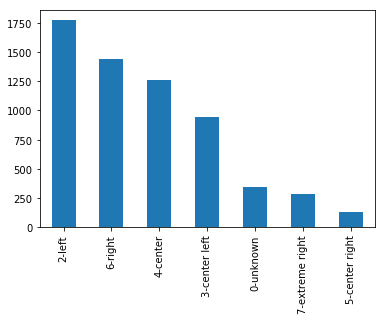

In [561]:
print df.wing.value_counts()
df.wing.value_counts().plot(kind = 'bar')

In [562]:
df['label'] = 'REAL'

In [563]:
df.tail()

,url,title,text,wing,conspiracy,satire,label
Unnamed: 0,,,,,,,
6368,https://www.nytimes.com/2017/08/30/us/politics...,Google Critic Ousted From Think Tank Funded by...,Ms. Slaughter told Mr. Lynn that “the time has...,3-center left,0,0,REAL
6369,http://www.politico.com/story/2017/06/20/grene...,Grenell under consideration to be ambassador t...,Richard Grenell is now unlikely to be named th...,3-center left,0,0,REAL
6370,http://www.politico.com/story/2017/09/01/trump...,"Trump's Dreamers decision could roil shutdown,...",The White House said Friday that President Don...,3-center left,0,0,REAL
6371,http://www.politico.eu/article/merkel-quashes-...,Merkel quashes hopes of ambitious eurozone ref...,German Chancellor Angela Merkel | Sean Gallup/...,6-right,0,0,REAL
6372,https://newrepublic.com/minutes/144619/new-yor...,Why is The New York Times op-ed page publishin...,"Prince, whose notorious company Blackwater was...",0-unknown,0,0,REAL


In [564]:
df = df[df.wing !='unknown']

In [565]:
df.reset_index(inplace = True)
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [566]:
# Simplifying the url situation. will just leave domain and suffix. 
# Later you will see even this is too much 

for i in range(df.shape[0]): 
    ext = tldextract.extract(df.loc[i,'url'])
    try: 
        df.set_value(i,'url', (ext.domain+'.'+ext.suffix))
    except:
        None
df.tail()

,url,title,text,wing,conspiracy,satire,label
6171,nytimes.com,Google Critic Ousted From Think Tank Funded by...,Ms. Slaughter told Mr. Lynn that “the time has...,3-center left,0,0,REAL
6172,politico.com,Grenell under consideration to be ambassador t...,Richard Grenell is now unlikely to be named th...,3-center left,0,0,REAL
6173,politico.com,"Trump's Dreamers decision could roil shutdown,...",The White House said Friday that President Don...,3-center left,0,0,REAL
6174,politico.eu,Merkel quashes hopes of ambitious eurozone ref...,German Chancellor Angela Merkel | Sean Gallup/...,6-right,0,0,REAL
6175,newrepublic.com,Why is The New York Times op-ed page publishin...,"Prince, whose notorious company Blackwater was...",0-unknown,0,0,REAL


In [567]:
df.groupby('wing').sum()

,conspiracy,satire
wing,,
0-unknown,0,0
2-left,0,0
3-center left,0,0
4-center,2,0
5-center right,0,0
6-right,1,0
7-extreme right,0,0


With the web scraped set I decided to go different ways:
Code is borrowed from Evann Smith's LDA presentation
https://github.com/baursafi/GA/blob/master/modeling_text_data.ipynb

### Preprocess the Data
- Lowercase
- Tokenize
- Remove stop words and punctuation
- Remove words with fewer than 2 characters
- Stem

In [568]:
stop = set(stopwords.words('english') + list(string.punctuation))
stemmer = PorterStemmer()
re_punct = re.compile('[' + ''.join(string.punctuation) + ']')

In [569]:
def preprocess(text):
    try:
        text = text.lower()
        tokens = word_tokenize(text)
        tokens = [t for t in tokens if not t in stop]
        tokens = [re.sub(re_punct, '', t) for t in tokens]
        tokens = [t for t in tokens if len(t) > 2]
        tokens = [stemmer.stem(t) for t in tokens]
        if len(tokens) == 0:
            return None
        else:
            return ' '.join(tokens)
    except:
        return None

In [570]:
data_w = df[['url','title','text','wing', 'conspiracy', 'label']]
print data_w.shape
data_w.head()

(6176, 6)


,url,title,text,wing,conspiracy,label
0,cnn.com,"A Catholic reads the Bible, week 43",(CNN) My father was known for his dry sense of...,2-left,0,REAL
1,cnn.com,It's not over: Veterans waiting months for app...,Los Angeles (CNN) Thousands of veterans who ar...,2-left,0,REAL
2,cnn.com,11 everyday items you should stop using now,Coffee pods deliver gourmet-quality coffee wit...,2-left,0,REAL
3,cnn.com,Eight foods that can be stored for years,"The news that, after 106 years, Captain Scott'...",6-right,0,REAL
4,cnn.com,Cohen lawyer rebuts Russia dossier allegations,Washington (CNN) The lawyer for a close ally o...,2-left,0,REAL


In [573]:
data_w['tokens'] = data_w['text'].progress_map(preprocess)
data_w = data_w[data_w['tokens'].notnull()]
data_w.reset_index(inplace=True)
data_w.drop('index', inplace=True, axis=1)

progress-bar: 100%|██████████| 6176/6176 [00:48<00:00, 56.55it/s] 
/Users/baurjansafi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [574]:
print('{} text'.format(len(data_w)))
data_w.head()

5505 text


,url,title,text,wing,conspiracy,label,tokens
0,cnn.com,"A Catholic reads the Bible, week 43",(CNN) My father was known for his dry sense of...,2-left,0,REAL,cnn father known dri sens humor one day cousin...
1,cnn.com,It's not over: Veterans waiting months for app...,Los Angeles (CNN) Thousands of veterans who ar...,2-left,0,REAL,lo angel cnn thousand veteran patient greater ...
2,cnn.com,11 everyday items you should stop using now,Coffee pods deliver gourmet-quality coffee wit...,2-left,0,REAL,coffe pod deliv gourmetqu coffe advantag low c...
3,cnn.com,Eight foods that can be stored for years,"The news that, after 106 years, Captain Scott'...",6-right,0,REAL,news 106 year captain scott fruitcak found ant...
4,cnn.com,Cohen lawyer rebuts Russia dossier allegations,Washington (CNN) The lawyer for a close ally o...,2-left,0,REAL,washington cnn lawyer close alli presid donald...


Now I can run the tokenized preprocessed news in the model fit on the DataCamp dataset.

In [575]:
# Transform the test set 
tfidf_test_tokens = tfidf_vectorizer.transform(data_w.tokens)
y = data_w.label

In [576]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

[u'\u062d\u0644\u0628', u'\u0639\u0631\u0628\u064a', u'\u0639\u0646', u'\u0644\u0645', u'\u0645\u0627', u'\u0645\u062d\u0627\u0648\u0644\u0627\u062a', u'\u0645\u0646', u'\u0647\u0630\u0627', u'\u0648\u0627\u0644\u0645\u0631\u0636\u0649', u'\u0e22\u0e07ade']


In [577]:
pred = clf.predict(tfidf_test_tokens)

In [578]:
pred_df = pd.DataFrame(pred)
pred_df[0].value_counts()

REAL    3086
FAKE    2419
Name: 0, dtype: int64

In [579]:
score = metrics.accuracy_score(y, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.561


In [580]:
data_w['pred'] = pred
data_w.head()

/Users/baurjansafi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,url,title,text,wing,conspiracy,label,tokens,pred
0,cnn.com,"A Catholic reads the Bible, week 43",(CNN) My father was known for his dry sense of...,2-left,0,REAL,cnn father known dri sens humor one day cousin...,FAKE
1,cnn.com,It's not over: Veterans waiting months for app...,Los Angeles (CNN) Thousands of veterans who ar...,2-left,0,REAL,lo angel cnn thousand veteran patient greater ...,REAL
2,cnn.com,11 everyday items you should stop using now,Coffee pods deliver gourmet-quality coffee wit...,2-left,0,REAL,coffe pod deliv gourmetqu coffe advantag low c...,REAL
3,cnn.com,Eight foods that can be stored for years,"The news that, after 106 years, Captain Scott'...",6-right,0,REAL,news 106 year captain scott fruitcak found ant...,FAKE
4,cnn.com,Cohen lawyer rebuts Russia dossier allegations,Washington (CNN) The lawyer for a close ally o...,2-left,0,REAL,washington cnn lawyer close alli presid donald...,REAL


In [581]:
# Here I decided to build a little table of how each wing of political affiliation performs on the FAKE/REAL model 
# trained on the DataCamp.com dataset.

z = pd.concat([data_w[data_w.pred == "FAKE"].wing.value_counts(),data_w[data_w.pred == "REAL"].wing.value_counts()], join='outer', axis = 1)

In [582]:
z.columns = ['FAKE', 'REAL']
z['TOTAL'] = z.REAL + z.FAKE
z['CREDIBILITY'] = z.REAL/(z.FAKE +z.REAL)
z.to_csv('data/z_pred.csv')
z

,FAKE,REAL,TOTAL,CREDIBILITY
0-unknown,105,220,325,0.676923
2-left,752,478,1230,0.388618
3-center left,403,534,937,0.569904
4-center,454,787,1241,0.634166
5-center right,54,72,126,0.571429
6-right,580,780,1360,0.573529
7-extreme right,71,215,286,0.751748


<font color = "red"> It is strange and I am very curious why the scraped news produce such a strange result for the left and extreme right wings. </font>

In [583]:
data_w[data_w.wing == '2-left'].url.value_counts()

cnn.com                  571
huffingtonpost.com       172
rabble.ca                168
huffingtonpost.kr         74
huffingtonpost.de         51
huffingtonpost.co.uk      50
huffingtonpost.fr         29
huffingtonpost.in         25
huffingtonpost.ca         23
huffingtonpost.gr         17
huffingtonpost.com.au     13
huffingtonpost.com.mx     12
newsbusters.org            9
huffingtonpost.es          4
politifact.com             3
huffingtonpost.co.za       2
huffingtonpost.jp          2
huffingtonpost.it          2
comparecards.com           1
hani.co.kr                 1
cnnmoneystream.com         1
Name: url, dtype: int64

In [584]:
data_w[data_w.wing == '7-extreme right'].url.value_counts()

breitbart.com            214
westernjournalism.com     69
liftable.com               1
sctimes.com                1
thewildcard.com            1
Name: url, dtype: int64

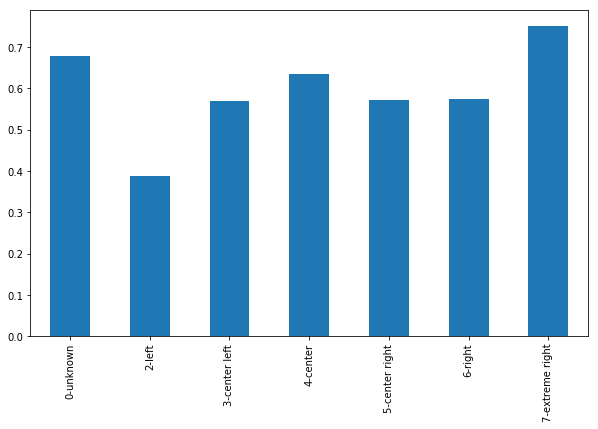

In [585]:
plt.figure(figsize=(10,6))
z.CREDIBILITY.plot(kind = 'bar')

<font color="#FF0000"><h3> I know, I know: but we have to remember, the model has been trained on a different dataset.</font></h3>

In [383]:
# Let's do the same for individual web-sites:

In [586]:
z_url = pd.concat([data_w[data_w.pred == "FAKE"].url.value_counts(),data_w[data_w.pred == "REAL"].url.value_counts()], join='outer', axis = 1)
z_url.fillna(0, inplace = True)
z_url.columns = ['FAKE', 'REAL']
z_url['TOTAL'] = z_url.REAL + z_url.FAKE
z_url['CREDIBILITY'] = z_url.REAL/(z_url.FAKE +z_url.REAL)
z_url.to_csv('data/z_url_pred.csv')
z_url[z_url.TOTAL>10].sort_values(by = 'CREDIBILITY', na_position='last', ascending=0).head(10)


,FAKE,REAL,TOTAL,CREDIBILITY
typepad.com,0.0,15.0,15.0,1.000000
natmonitor.com,2.0,28.0,30.0,0.933333
politico.com,6.0,73.0,79.0,0.924051
richmond.com,1.0,10.0,11.0,0.909091
politifact.com,106.0,757.0,863.0,0.877173
washingtonpost.com,2.0,14.0,16.0,0.875000
westernjournalism.com,9.0,60.0,69.0,0.869565
nytimes.com,4.0,19.0,23.0,0.826087
ajc.com,3.0,11.0,14.0,0.785714
politico.eu,20.0,64.0,84.0,0.761905


In [587]:
z_url[z_url.TOTAL>10].sort_values(by = 'CREDIBILITY', na_position='last', ascending=0).tail(10)

,FAKE,REAL,TOTAL,CREDIBILITY
bustle.com,324.0,185.0,509.0,0.363458
sctimes.com,419.0,210.0,629.0,0.333863
huffingtonpost.kr,58.0,16.0,74.0,0.216216
hpenews.com,100.0,24.0,124.0,0.193548
huffingtonpost.gr,14.0,3.0,17.0,0.176471
huffingtonpost.ca,25.0,4.0,29.0,0.137931
huffingtonpost.com.mx,12.0,1.0,13.0,0.076923
huffingtonpost.com,170.0,6.0,176.0,0.034091
huffingtonpost.de,58.0,2.0,60.0,0.033333
huffingtonpost.fr,32.0,0.0,32.0,0.000000


<h2><font color = "green"> Part 4: Merging Kaggle and Web Scraped datasets </font></h2>

Below I will merge two datasets and re-fit the model and check it's accuracy

In [588]:
print data_f.shape
data_f.head(3)

(9925, 8)


,url,title,text,wing,conspiracy,label,tokens,pred
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,7-extreme right,0,FAKE,print pay back money plu interest entir famili...,FAKE
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,7-extreme right,0,FAKE,attorney gener loretta lynch plead fifth barra...,REAL
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,7-extreme right,0,FAKE,red state fox news sunday report morn anthoni ...,FAKE


In [589]:
print data_w.shape
data_w.head(3)

(5505, 8)


,url,title,text,wing,conspiracy,label,tokens,pred
0,cnn.com,"A Catholic reads the Bible, week 43",(CNN) My father was known for his dry sense of...,2-left,0,REAL,cnn father known dri sens humor one day cousin...,FAKE
1,cnn.com,It's not over: Veterans waiting months for app...,Los Angeles (CNN) Thousands of veterans who ar...,2-left,0,REAL,lo angel cnn thousand veteran patient greater ...,REAL
2,cnn.com,11 everyday items you should stop using now,Coffee pods deliver gourmet-quality coffee wit...,2-left,0,REAL,coffe pod deliv gourmetqu coffe advantag low c...,REAL


In [590]:
data_fw = pd.concat([data_f, data_w], axis=0, ignore_index=True)
data_fw.drop('pred', axis = 1, inplace = True)
print data_fw.shape
data_fw.head(3)

(15430, 7)


,url,title,text,wing,conspiracy,label,tokens
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,7-extreme right,0,FAKE,print pay back money plu interest entir famili...
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,7-extreme right,0,FAKE,attorney gener loretta lynch plead fifth barra...
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,7-extreme right,0,FAKE,red state fox news sunday report morn anthoni ...


<h2><font color = "green">Train/test split. Fitting the model and getting results</font></h2>

In [591]:
# Checking how balanced the observation groups are.
data_fw.label.value_counts()

FAKE    9925
REAL    5505
Name: label, dtype: int64

In [592]:

#Set `y` 
y = data_fw.label 

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(data_fw['text'], y, test_size=0.33, random_state=53)
print 'X_train - ', X_train.shape, 'y_train - ', y_train.shape
print 'X_test - ', X_test.shape, 'y_test - ', y_test.shape


X_train -  (10338,) y_train -  (10338,)
X_test -  (5092,) y_test -  (5092,)


In [593]:
# Initialize the `tfidf_vectorizer`
tfidf_vectorizer = TfidfVectorizer(stop_words=['english','indian','chinese','korean'], max_df=0.8) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [594]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

[u'\ud798\ub4e4\uc5b4\ud558\uace0', u'\ud798\ub4e4\uc5c8\ub2e4', u'\ud798\ub4e4\uc5c8\ub2e4\ub294', u'\ud798\uc5d0', u'\ud798\uc740', u'\ud798\uc744', u'\ud798\uc774', u'\ud798\uc785\uc5b4', u'\ud799\ud569\ud074\ub7fd\uc5d0\uc11c', u'\ufb01rearms']


In [595]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
print tfidf_df.shape
tfidf_df.head()

(10338, 100937)


,00,000,0000,0001,00012,000202,000205,0009,000ft,000km,...,힘들어하고,힘들었다,힘들었다는,힘에,힘은,힘을,힘이,힘입어,힙합클럽에서,ﬁrearms
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.158593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [596]:
clf = MultinomialNB() 

In [597]:
# Decided to run cross-validation to mixup a little bit the data
from sklearn.model_selection import cross_val_score

clf_score = cross_val_score(clf, tfidf_train, y_train, cv=10)

print clf_score
print "Accuracy =", clf_score.mean()

[ 0.71014493  0.73017408  0.73017408  0.73597679  0.71083172  0.72147002
  0.72630561  0.73281704  0.72604066  0.7357212 ]
Accuracy = 0.72596561257


accuracy:   0.735
Confusion matrix, without normalization


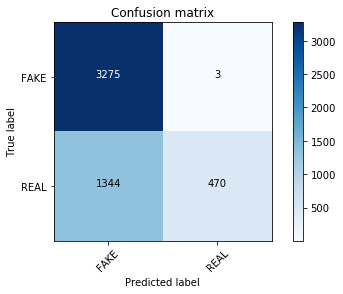

In [598]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [599]:
# Transform the whole set 
tfidf_fw = tfidf_vectorizer.transform(data_fw.text)
pred_fw = clf.predict(tfidf_fw)

In [600]:
pred_fw.shape

(15430,)

In [601]:
data_fw['pred'] = pred_fw
data_fw.head()

,url,title,text,wing,conspiracy,label,tokens,pred
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,7-extreme right,0,FAKE,print pay back money plu interest entir famili...,FAKE
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,7-extreme right,0,FAKE,attorney gener loretta lynch plead fifth barra...,FAKE
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,7-extreme right,0,FAKE,red state fox news sunday report morn anthoni ...,FAKE
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,7-extreme right,0,FAKE,email healthcar reform make america great sinc...,FAKE
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,7-extreme right,0,FAKE,print hillari goe absolut berserk explod bill ...,FAKE


In [602]:
print 'Fake news correctly predicted - ',data_fw['url'][(data_fw.label == "FAKE")&(data_fw.pred == "FAKE")].count()/float(data_fw['url'][(data_fw.label == "FAKE")].count())
print 'Real news correctly predicted - ',data_fw['url'][(data_fw.label == "REAL")&(data_fw.pred == "REAL")].count()/float(data_fw['url'][(data_fw.label == "REAL")].count())

Fake news correctly predicted -  0.999496221662
Real news correctly predicted -  0.276112624886


In [603]:
z_real = data_fw[data_fw.label == 'REAL']

In [604]:
# Now let's see how it looks in terms of politial affiliations

z_fw = pd.concat([z_real[z_real.pred == "FAKE"].wing.value_counts(),z_real[z_real.pred == "REAL"].wing.value_counts()], join='inner', axis = 1)

In [605]:
z_fw.columns = ['FAKE', 'REAL']
z_fw['TOTAL'] = z_fw.REAL + z_fw.FAKE
z_fw['CREDIBILITY'] = z_fw.REAL/(z_fw.FAKE +z_fw.REAL)
z_fw.to_csv('data/z_fw_pred.csv')
z_fw.sort_index(ascending=True,inplace=True)

<font color = "red"> It is strange and I am very curious why the scraped news produce such a strange result for the left and extreme right wings. </font>

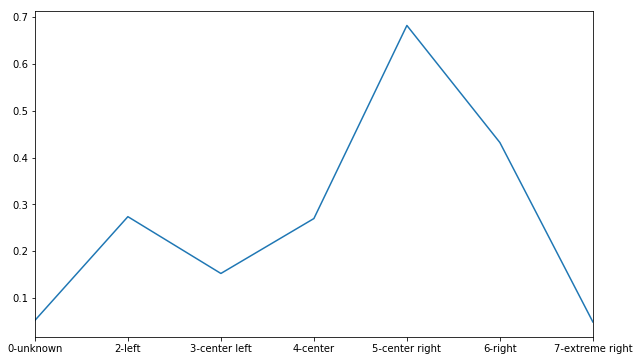

In [608]:
plt.figure(figsize=(10,6))
z_fw.CREDIBILITY.plot()

In [609]:
z_fw_url = pd.concat([z_real[z_real.pred == "FAKE"].url.value_counts(),z_real[z_real.pred == "REAL"].url.value_counts()], join='inner', axis = 1)


In [610]:
z_fw_url.columns = ['FAKE', 'REAL']
z_fw_url['TOTAL'] = z_fw_url.REAL + z_fw_url.FAKE
z_fw_url['CREDIBILITY'] = z_fw_url.REAL/(z_fw_url.FAKE +z_fw_url.REAL)

z_fw_url[z_fw_url.TOTAL>20].sort_values(by = 'CREDIBILITY', na_position='last', ascending=0).head(15)

,FAKE,REAL,TOTAL,CREDIBILITY
huffingtonpost.fr,1,31,32,0.968750
huffingtonpost.kr,4,70,74,0.945946
hpenews.com,19,105,124,0.846774
postbulletin.com,58,293,351,0.834758
sctimes.com,209,420,629,0.667727
huffingtonpost.ca,13,16,29,0.551724
huffingtonpost.com,85,91,176,0.517045
usatoday.com,140,56,196,0.285714
bustle.com,409,100,509,0.196464
chicagotribune.com,294,69,363,0.190083


<h2><font color = "green"> Preliminary Conclusion </font></h2>

The initial idea - to use Naive Bayes, the way it is used to identify spam emails helped to confirm the initial fake set but proved barely reliable in estimating the reliability of the news through web-scraping. Identification of fake news shall be approached from the point of view of fact checking. In other words it is important to separate opinions from facts and as opinions may vary from extreme left to extreme right, even staying neutral in opinions remains in the realm of opinions and can't be fact checked. 

Fact checking, unlike opinions, must be based on a different approach. It will require more advanced machine learning, topic identification and fact comparison. 

<h2><font color = green> Other machine learning methods </font></h2>
I wanted to see how other methods perform on the same dataset and what results they produce for the scraped news.

In [611]:
#Here I will try to run SVM to better understand how to read my findings

texts = data_fw.tokens.tolist()
y = data_fw.label.tolist()
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
X = vectorizer.fit_transform(texts)

In [612]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Feature Selection
- With text data, the number of features (words) is almost always much larger than the number of samples (documents).
- We want to select the most discriminant features for classification.
- We use Chi2, which calculates the Chi square statistic for each word, relative to class. Chi2 measures the dependence between stochastic variables, so words with a low Chi2 are likely to be independent of class and thus not useful for classifcation. We want to keep the words with the highest Chi2 value.

In [613]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [614]:
total_features = len(vectorizer.get_feature_names())
print('{} total features prior to selection'.format(total_features))
ch2 = SelectKBest(chi2, k=500)
X_train = ch2.fit_transform(X_train, y_train)
X_test = ch2.transform(X_test)
X = ch2.transform(X)

26701 total features prior to selection


In [615]:
X.shape

(15430, 500)

In [616]:
feature_names = list(vectorizer.get_feature_names())
mask = ch2.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
        

In [617]:
data_frame = pd.DataFrame(data=X.todense(), columns=new_features)
data_frame.describe()

,08월,09월,2016,2017,2017년,31일,53f,55903,55f,71f,...,yard,yemen,yesterday,게시됨,따르면,라고,있는,있다,지난,한다
count,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,...,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000
mean,0.000330,0.000312,0.012270,0.005754,0.000622,0.000386,0.000484,0.002851,0.002456,0.000484,...,0.001029,0.001470,0.001554,0.000510,0.000253,0.000276,0.000305,0.000606,0.000307,0.000247
std,0.008669,0.008246,0.023699,0.023533,0.011257,0.009937,0.012027,0.024512,0.023130,0.012027,...,0.013320,0.017924,0.010174,0.009775,0.007566,0.007358,0.007645,0.012729,0.008382,0.006551
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.017664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.355967,0.345951,0.292799,0.485850,0.321643,0.427560,0.299033,0.224577,0.221277,0.299033,...,0.489405,0.512093,0.188285,0.315513,0.471552,0.380691,0.335889,0.530170,0.444987,0.290129


In [618]:
#Train and predict

In [619]:
classifier_SV = LinearSVC()
%time classifier_SV.fit(X_train, y_train)
print('Accuracy: {}'.format(round(classifier_SV.score(X_test, y_test), 3)))

CPU times: user 53.6 ms, sys: 3.51 ms, total: 57.1 ms
Wall time: 54.9 ms
Accuracy: 0.907


In [620]:
classifier_RFC = RandomForestClassifier()
%time rfc = classifier_RFC.fit(X_train, y_train)
print('Accuracy: {}'.format(round(classifier_RFC.score(X_test, y_test), 3)))

CPU times: user 700 ms, sys: 11.3 ms, total: 711 ms
Wall time: 713 ms
Accuracy: 0.907


In [621]:
classifier_GNB = GaussianNB()
%time classifier_GNB.fit(X_train.toarray(), y_train)
print('Accuracy: {}'.format(round(classifier_GNB.score(X_test.toarray(), y_test), 3)))

CPU times: user 64.7 ms, sys: 66.5 ms, total: 131 ms
Wall time: 131 ms
Accuracy: 0.828


In [622]:
classifier_GBC = GradientBoostingClassifier()
%time classifier_GBC.fit(X_train.toarray(), y_train)
print('Accuracy: {}'.format(round(classifier_GBC.score(X_test.toarray(), y_test), 3)))

CPU times: user 23.1 s, sys: 106 ms, total: 23.2 s
Wall time: 23.3 s
Accuracy: 0.904


<b> I decided to try Random Forest Classifier and see how the web scraped news set performed in the test</b>

In [623]:
pred_RFC = classifier_RFC.predict(X)

In [624]:
data_fw['pred_RFC'] = pred_RFC
data_fw.head()

,url,title,text,wing,conspiracy,label,tokens,pred,pred_RFC
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,7-extreme right,0,FAKE,print pay back money plu interest entir famili...,FAKE,FAKE
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,7-extreme right,0,FAKE,attorney gener loretta lynch plead fifth barra...,FAKE,FAKE
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,7-extreme right,0,FAKE,red state fox news sunday report morn anthoni ...,FAKE,FAKE
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,7-extreme right,0,FAKE,email healthcar reform make america great sinc...,FAKE,FAKE
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,7-extreme right,0,FAKE,print hillari goe absolut berserk explod bill ...,FAKE,FAKE


In [625]:
print 'Fake news correctly predicted - ',data_fw['url'][(data_fw.label == "FAKE")&(data_fw.pred_RFC == "FAKE")].count()/float(data_fw['url'][(data_fw.label == "FAKE")].count())
print 'Real news correctly predicted - ',data_fw['url'][(data_fw.label == "REAL")&(data_fw.pred_RFC == "REAL")].count()/float(data_fw['url'][(data_fw.label == "REAL")].count())

Fake news correctly predicted -  0.991939546599
Real news correctly predicted -  0.925340599455


In [626]:
importances_rfc = pd.DataFrame(zip(new_features,rfc.feature_importances_), columns = ["words","importance"])
importances_rfc.sort_values(by="importance",ascending=False).head(10)

,words,importance
76,clinton,0.037533
3,2017,0.035350
133,elect,0.030572
295,octob,0.027324
2,2016,0.024814
183,hillari,0.024347
289,novemb,0.020971
405,sourc,0.017182
210,it,0.016495
373,said,0.016265


In [627]:
z_real = data_fw[data_fw.label == 'REAL']

In [628]:
# Now let's see how it looks in terms of politial affiliations

z_fw = pd.concat([z_real[z_real.pred_RFC == "FAKE"].wing.value_counts(),z_real[z_real.label == "REAL"].wing.value_counts()], join='inner', axis = 1)

In [629]:
z_fw.columns = ['FAKE', 'REAL']
z_fw['TOTAL'] = z_fw.REAL + z_fw.FAKE
z_fw['CREDIBILITY'] = z_fw.REAL/(z_fw.FAKE +z_fw.REAL)
z_fw.to_csv('data/z_fw_pred.csv')
z_fw.sort_index(ascending=True,inplace=True)

In [630]:
z_fw

,FAKE,REAL,TOTAL,CREDIBILITY
0-unknown,56,325,381,0.853018
2-left,103,1230,1333,0.922731
3-center left,84,937,1021,0.917728
4-center,55,1241,1296,0.957562
5-center right,6,126,132,0.954545
6-right,74,1360,1434,0.948396
7-extreme right,33,286,319,0.896552


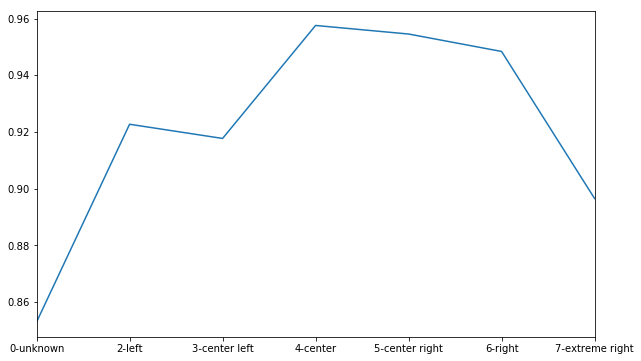

In [631]:
plt.figure(figsize=(10,6))
z_fw.CREDIBILITY.plot()

In [632]:
z_fw_url = pd.concat([z_real[z_real.pred_RFC == "FAKE"].url.value_counts(),z_real[z_real.pred_RFC == "REAL"].url.value_counts()], join='inner', axis = 1)


In [633]:
z_fw_url.columns = ['FAKE', 'REAL']
z_fw_url['TOTAL'] = z_fw_url.REAL + z_fw_url.FAKE
z_fw_url['CREDIBILITY'] = z_fw_url.REAL/(z_fw_url.FAKE +z_fw_url.REAL)

z_fw_url[z_fw_url.TOTAL>20].sort_values(by = 'CREDIBILITY', na_position='last', ascending=0).head(10)

,FAKE,REAL,TOTAL,CREDIBILITY
huffingtonpost.com,2,174,176,0.988636
sctimes.com,8,621,629,0.987281
huffingtonpost.kr,1,73,74,0.986486
huffingtonpost.de,1,59,60,0.983333
postbulletin.com,7,344,351,0.980057
newsbusters.org,7,171,178,0.960674
chicagotribune.com,15,348,363,0.958678
politifact.com,42,821,863,0.951333
usatoday.com,12,184,196,0.938776
bustle.com,36,473,509,0.929273


In [634]:
z_fw_url[z_fw_url.TOTAL>20].sort_values(by = 'CREDIBILITY', na_position='last', ascending=0).tail(10)

,FAKE,REAL,TOTAL,CREDIBILITY
timesofsandiego.com,4,31,35,0.885714
rabble.ca,28,179,207,0.864734
latimes.com,11,55,66,0.833333
natmonitor.com,6,24,30,0.800000
politico.com,16,63,79,0.797468
westernjournalism.com,14,55,69,0.797101
nytimes.com,6,17,23,0.739130
huffingtonpost.in,7,19,26,0.730769
politico.eu,23,61,84,0.726190
huffingtonpost.co.uk,17,42,59,0.711864


In [635]:
# Below is the code to check which news were predicted as fake. Very intersting
# print list(data_fw[(data_fw.url == 'sctimes.com')&(data_fw.pred_RFC == 'FAKE')].text)

<font color = "green"><h3> Validation Curve </h3></font>
The code below is borrowed from sklearn documentation. This is the validation curve to visualize and identify possible overfitting.
http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html

Automatically created module for IPython interactive environment


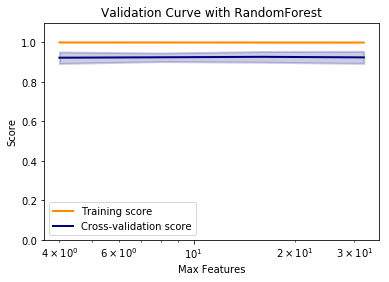

In [636]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = [4,8,16,32]
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X, y, param_name="max_features", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RandomForest")
plt.xlabel("Max Features")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Automatically created module for IPython interactive environment


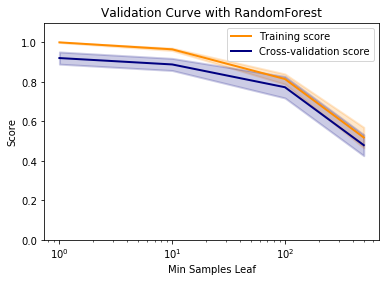

In [637]:
# THe code below is borrowed from sklearn documentation:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html

print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = [1,10,100,500]
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X, y, param_name="min_samples_leaf", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RandomForest")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

<h2><font color = 'green'> Web scraping part. </font></h2>

### The data has been scraped using 'newspaper' package
I selected 15 news agencies and aggregators with a high level of credibility.
The source of credibility ranking is mediabiasfactcheck.com 
Given that the news agencies / aggregators have high credibility rating I will use them as 
"REAL" news to later add to the "FAKE" news data set.

In [638]:
import newspaper

In [639]:
url = ['http://hpenews.com', 'http://latimes.com', 'http://usatoday.com', 
       'http://politifact.com/', 'http://chicagotribune.com', 'http://huffingtonpost.com/', 
       'http://sctimes.com/', 'http://justfactsdaily.com/', 'http://bustle.com/', 
       'http://rabble.ca/', 'http://justfactsdaily.com/', 'http://timesofsandiego.com/', 
       'http://postbulletin.com/', 'http://natmonitor.com/','http://politico.com/',
       'http://cnn.com', 'http://www.breitbart.com/']


In [439]:
webdata = pd.DataFrame(columns=['url', 'authors', 'title', 'text'])

Below is the news web-scrapering loop. I saved it as a Markdown in order to not start it again. 

for i in url:
    paper = newspaper.build(i)
    for article in paper.articles[:500]:
        time.sleep(1)
        article.download()
        article.parse()
        url = article.url
        authors = article.authors
        title = article.title
        text = article.text
        webdata = webdata.append({'url':url, 'authors':authors, 'title':title, 'text':text}, ignore_index=True)

In [440]:
webdata = webdata[webdata['title'] != 'Error']

In [441]:
webdata.shape

(0, 4)

In [442]:
webdata = webdata[['url', 'title','text']]
webdata.head(2)

,url,title,text


I scraped several times on several resources. In order to avoid the repetition of the same news scraped below is the check for duplicates

In [614]:
webdata[webdata.duplicated() == True].shape

(197, 3)

In [615]:
webdata.drop_duplicates(keep='first',inplace=True)
webdata.shape

(6176, 3)

It seems smart to just save it as a csv file. As the computer started working unreliably.

In [ ]:
webdata.to_csv('../capstone_data/scraped_news.csv', sep=',', encoding = 'UTF-8')

### This resumes my capstone project. Thank you for the knowledge and skills you trained in us. There is a plethora of material to continue studying. Hope it finds practical application in real life. 